# SC3011TN - Stochastische Signaalanalyse - 2020/2021

# Group details

 **Group number**: ...
 
 **Student 1**:
 
     Name: Jeroen Sangers
     
     Student number: 4645197

 **Student 2**: 
 
     Name: Reinaart van Loon 
     
     Student number: 4914058

 **Date of completion**: ...

## Question 1
If the random process $x(k)$ in (1.1) is wide-sense stationary (WSS), what can you say about its mean and variance? And what if the process is not WSS?

### Answer 1

If WSS:

Its mean is constant and finite :         $ \; \; \; m_x (k) = m_x < \infty $ \
The variance is fintite and for a complex stochastic process non-negative for:      $  \; \; \; c_x (0) < \infty  \; \; \; \; \& \; \; \; \; r_x(0) \geq 0$
\


If not WSS:

Its mean depends on the index: so $ \; \; \; m_x (k) \; \; not \; always \; \; m_x (k+l)$ \
Variance can be infinite





In [1]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import scipy as sci
from tqdm import tqdm
from scipy.optimize import least_squares

# Initiate random seed for reproducible results
np.random.seed(2021)

# Constants (Table 2.1 of the assignment text)
N = 1e5                       # Number of samples
dt = 1e-3                     # Sampling period
m = 0.01                      # Mass of the black hole
a = 3*np.pi/16                # Plummer radius
b_max = a                     # Maximum impact parameter
G = 1                         # Normalized gravitational constant
M = 1                         # Normalized total cluster mass
V_0 = np.sqrt(G*M/(2*a))      # Relative velocity with interacting stars
Lambda = b_max*V_0**2/(G*m)   # Coulomb logarithm factor
c = G*M*m/a**3                # Spring constant
gamma = 128*np.sqrt(2)/(7*np.pi) * np.sqrt(G/(M*a**3)) * m**2 * np.log(Lambda) # Friction coefficient

As the number of interacting stars $N_{\text{star}}$, fill in the first 5 digits of the student number of Student 1

In [2]:
N_star = 46451   # First 5 digits of student number of Student 1; number of interacting stars
m_star = M/N_star # Mass of an individual interacting star
R = 4*G*M*m_star*gamma/(9*a) # Noise factor

## Question 2

Let $x(k)$ be the discrete-time representation of the position of the black hole, with $t = k\Delta t$. Derive the discrete-time dynamics of $x(k)$. That is, find the parameters $\beta_1, \beta_2, \beta_3$ in the following second order difference equation:

$$x(k)+\beta_1 \cdot x(k-1)+\beta_2 \cdot x(k-2) = \beta_3 \cdot \tilde w(k)$$

Use Euler's backward approximation to approximate the derivative operator $\frac{d(.)}{dt}$ and second order derivative operator $\frac{d^2(.)}{d^2t}$ in (1.1). Subsequently replace the white noise signal $w(t)$ by a discrete white noise sequence as outlined in Section 1.3. 

### Provide:
1. Analytical expressions for the parameters $\beta_1, \beta_2, \beta_3$
2. Their numerical values, by making use of the data given in Table 2.1

### Answer 2
$\beta_1 = -\frac{2m+\gamma \Delta t }{m + \gamma \Delta t + c \Delta t^2}$ 

$\beta_2 = \frac{m}{m + \gamma \Delta t + c \Delta t^2}$

$\beta_3 = \frac{\sqrt{R} \Delta t^2}{m + \gamma \Delta t + c \Delta t^2} $

In [3]:
b1 = -(2*m + gamma*dt)/(m+gamma*dt+c*dt**2)
b2 = m/(m+gamma*dt+c*dt**2)
b3 = np.sqrt(R)*dt**2/(m+gamma*dt+c*dt**2)

## Question 3

Analyze the stochastic discrete-time dynamics in the z-domain. Specifically, answer the following questions:
1. Using the z-transform, determine the transfer function $H(z)$ from $\tilde{w}$ to $x$ of the discrete-time dynamical system described by difference equation (2.1).
2. Determine the poles of $H(z)$.
3. Is this system (BIBO) stable? Use Definition 2.5 or Lemma 2.6 on page 24 of the reader.

### Answer 3
1. $ H(z) = \frac{\beta_3}{1+\beta_1 z^{-1} + \beta_2 z^{-2}} $ 



2. $ p_1 = 0,99963... + 0.00218...j $ \
$ p_2 = 0,99963... - 0.00218...j $



3. We are looking at a causal system (only past and present values are used in difference function 2.1) and both poles are inside the unit circle, so R.O.C. includes the unit circle. Therefore, the system is stable and therefore BIBO stable. 


In [4]:
### Calculation cell 
import cmath
z_1 = 1j+1
z_2 = 1j+1

z_1 = (-b1+cmath.sqrt(b1**2-4*b2))/2
z_2 = (-b1-cmath.sqrt(b1**2-4*b2))/2

r = np.sqrt(np.real(z_2)**2 + np.imag(z_2)**2)



## Question 4
Simulate a single realization of the trajectory of the black hole. That is, simulate the difference equation (2.1) for $k = 3,\cdots,N$ with $N = 5000$ using the initial conditions $x(1) = x(2) = 0 $. Hereby you should generate discrete white noise samples using the **Numpy** command [`np.random.normal(size=N)`](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html)

### Provide:
1. Python code to generate $N$ samples of $x(k)$
2. Plot a realization of one sequence $x(k)$
3. Explain the results. Do the results agree with your analysis in Question 3?

### Answer 4
Yes, it seems stable since the displacement doesn't diverge. Also, it seems to keep oscilalting around zero, as if there is a restoring force.

In [5]:
N = 5000

x = np.empty(N)
x[0]=0
x[1]=0

w = np.random.normal(size=N)

Simulate the difference equation:

In [6]:
for k in range(N-2):
    x[k+2] = b3*w[k+2]-b2*x[k]-b1*x[k+1]


Plot the results:

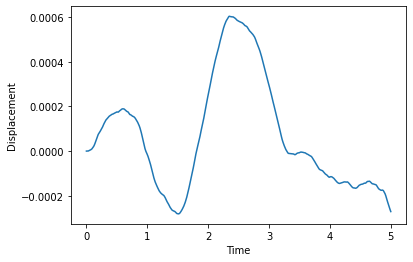

In [7]:
plt.figure(1)
plt.plot(np.arange(N)*dt,x)
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.show()

## Question 5
 
In Question 4, you generated one realization of the trajectory of the black hole. To formalize this, let us denote the realization generated in Question 4 as $x(k,\lambda)$ for $\lambda = 1$ and the corresponding white noise sequence as $\tilde{w}(k,1)$. 

Now, simulate multiple realizations of the trajectory of the black hole. Specifically, generate $L$ realizations $x(k,\lambda)$ for $\lambda = 1,\cdots,L$, with each realization generated for a different realization of the discrete time white noise sequence $\tilde{w}(k,\lambda)$. 

NB. You may overwrite the realization generated in Question 4.

### Provide:
1. Python script used to generate $L$ realizations $x(k,\lambda)$ sequences
2. Plot of all $L$ realizations for $L = 50$
3. Explain the results. Do the results agree with your analysis in Question 3?

### Answer 5
Again it seems stable since the cluster of realizations is around the horizontal axis with a displacement of 0. Therefore, the system doesn't seem to diverge.

Also, there seems to be a restoring force that stimulates oscillation. 

In [8]:
L = 50
x = np.zeros((N,L))
w = np.random.normal(size=(N,L))

Perform L realizations of the difference equation

In [9]:
for l in range(L):
    for k in range(N-2):
        x[k+2,l] = b3*w[k+2,l]-b2*x[k,l]-b1*x[k+1,l]

Plot the results

<function matplotlib.pyplot.show(close=None, block=None)>

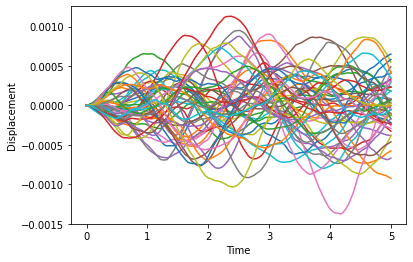

In [10]:
plt.figure(2)
plt.plot(np.arange(N)*dt,x)
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.show

## Question 6

**NB: Make sure your computer has enough memory / try small L values first!**

Now, simulate even more realizations of the trajectory of the black hole.

Increase $L$, as defined in Question 5, to respectively $L = 100, \ 500, \ 2500$. For each value of $L$, obtain all realizations at time steps $k = 10^3$, $k = 10^4$ and $k = 10^5$. That is, find $\{x(10^3,\lambda)\}_{\lambda = 1}^L, \ \{x(10^4,\lambda)\}_{\lambda = 1}^L, \ \{x(10^5,\lambda)\}_{\lambda = 1}^L$. 

Using this data, generate histograms with **python** command `matplotlib.pyplot.hist()`, for each combination of time $k = 10^3,10^4,10^5$ and amount of realizations $L = 100, \ 500, \ 2500$. Your answer should thus consist of $9$ histograms. The number of bins in each histogram should be equal to $\sqrt{L}$.  

### Provide:
1. One figure containing the 9 histograms. Make sure the figure has no overlapping text!
2. Comment on your results.

### Answer 6
The further we go in time (graphs further to the RHS), the variance becomes larger. This is seen by a more spreaded histogram. 


The more realizations we use (graphs further down), the histograms converge to a smoother curve. 



In [11]:
Ls =  np.asarray([100,500,2500]) # Array containing realization instances (i.e. 100, 500, 2500)
Ns =  np.asarray([1e3,1e4,1e5])   # Array containing time instances (i.e. 1e3, 1e4, 1e5)

Take $L$ the maximum number of simulations we need to compare (We can take subsets for the lower values of L). Recall that $N$ is the maximum number of time steps we need to simulate.

In [12]:
L = Ls[-1]
N = Ns[-1]
x = np.zeros((int(N),L))
w = np.random.normal(size=(int(N),L))

Simulate the difference equation $L$ times. Depending on your hardware and code, this step could take 10-15 min. 

NB. You can also vectorize the below computations instead of using a loop and use numpy operations to significantly speed up computations on arrays.

In [13]:


for l in range(L):
    for k in range(int(N)-2):
        x[k+2,l] = b3*w[k+2,l]-b2*x[k,l]-b1*x[k+1,l]


100%|██████████| 2500/2500 [02:51<00:00, 14.56it/s]


Take different subsets of the data for each combination of $k$ and $L$ and plot the results as histograms:

100%|██████████| 3/3 [00:02<00:00,  1.14it/s]


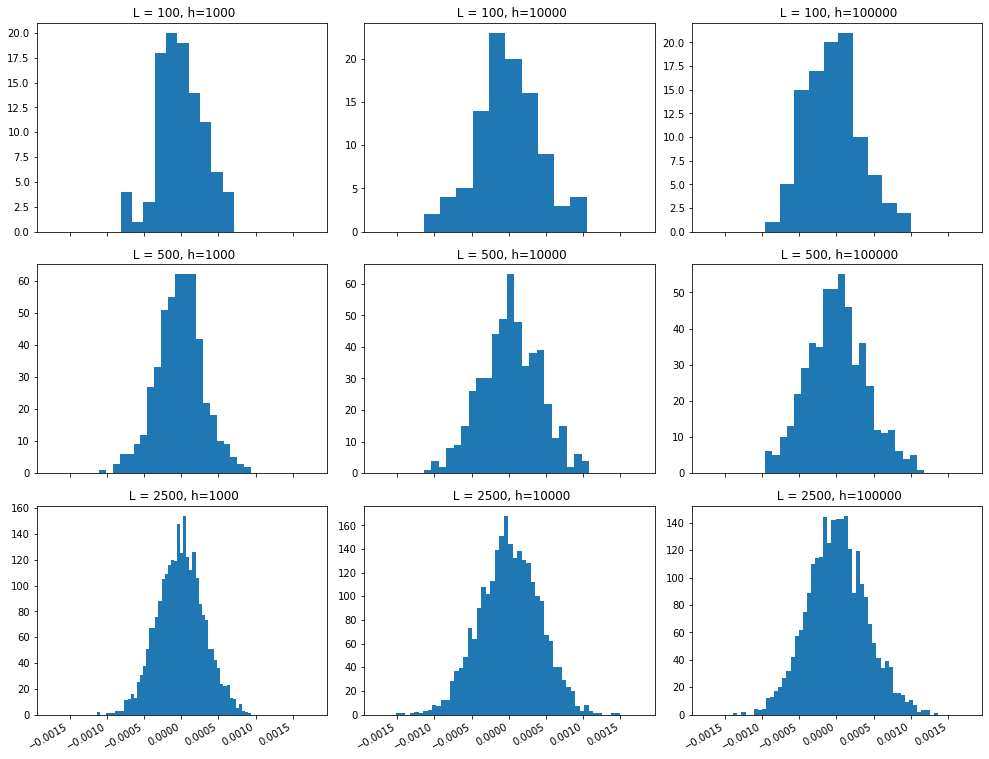

In [14]:
fig, axs = plt.subplots(3, 3, figsize = [13.8, 10.6], tight_layout = 3.0)
fig.autofmt_xdate()

for i in range(len(Ls)):
    L = Ls[i]
    for j in range(len(Ns)):
        h = Ns[j]
        axs[i, j].hist(x[int(h)-1,0:L], bins=int(np.sqrt(L)))
        axs[i, j].set_title(' L = %d, h=%d' % (L,h))
        axs[i, j].set_xlim([np.min(x), np.max(x)])

## Question 7
Fit a Gaussian function, given by $f(\alpha) = \kappa e^{-\frac{\alpha^2}{2\sigma^2}}$, to the $9$ histograms Question 6. For that purpose, denote the center of bin $i$ of the histogram by $\alpha _i$ and the corresponding height of the histogram as $h(\alpha_i)$. Then solve the following least squares optimization problem using the **scipy** function [`scipy.optimize.least_squares()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.least_squares.html)

$$ \hat{\kappa}, \ \hat{\sigma} = arg \ min_{\kappa,\sigma} \sum_{i=1}^P \Bigg( h(\alpha_i)-\kappa e^{-\frac{\alpha_i^2}{2\sigma^2}} \Bigg)^2 $$

Hint: You can use the numpy function `numpy.std` to get an estimate of the standard deviation of the random samples $\{x(k,\lambda)\}$. Together with the number of elements in the largest bin, you can use this to derive initial estimates of $\kappa$ and $\sigma$ in the Gaussian function.

### Provide:
1. Python script reading the random samples and the samples $h(\alpha _i)$ of the histograms
2. 9 plots of the histograms and the Gaussian fits in one figure. Make sure the figure has no overlapping text!
3. Comment on your results.

### Answer 7
The histograms converge to gaussian shapes for more realizations.

The left-bottom graph is closer to the best gaussian fit than the right-bottom graph.

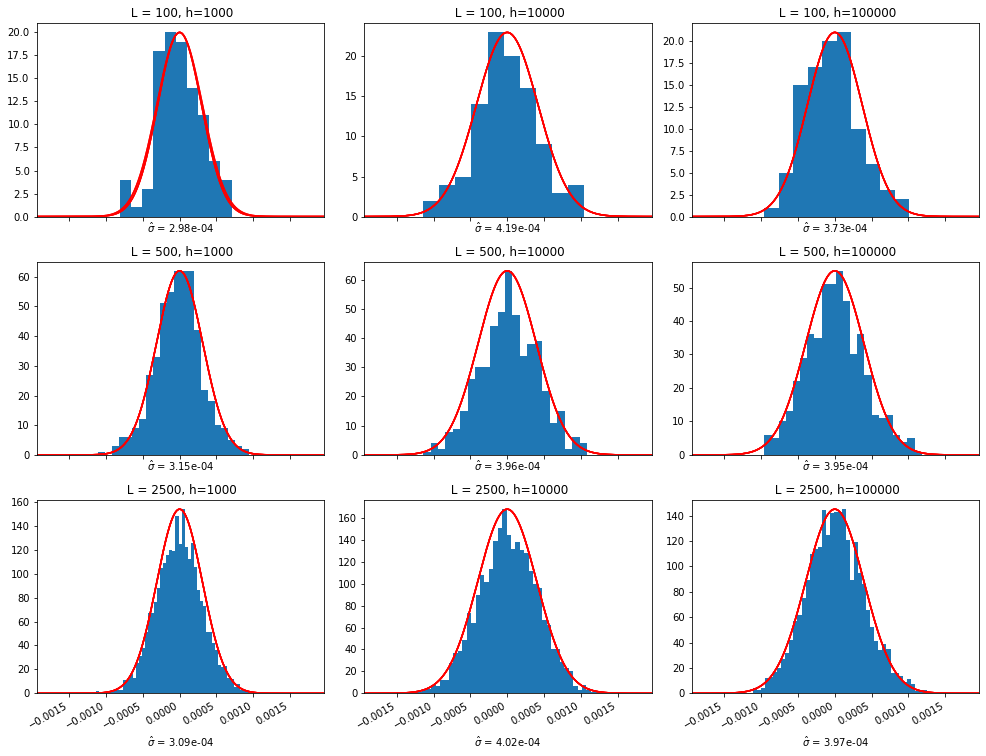

In [60]:

# define functions
def model(x, alpha):
    '''
    Define the Gaussian function
    
    Inputs:
        x: array of fitting parameters (i.e. kappa, sigma)
        alpha: coordinate to describe the center of a bin of a histogram
    '''
    gaussian = x[0]*np.exp(-alpha**2/(2*x[1]**2))
    return gaussian

def error(x, alpha, h): 
    '''
    Define the difference between the simulated data and the Gaussian function.
    That is, the difference between the center of each bin of the histogram and 
    the corresponding coordinate of the Gaussian density function.
    
    Inputs:
        x: array of fitting parameters (i.e. kappa, sigma)
        alpha: coordinate to describe the center of a bin of a histogram
        h: height of the histogram at coordinate alpha
    '''
    difference = h-model(x,alpha)
    return difference

def jac(x, alpha, h):
    '''
    Define Jacobian, i.e. the partial derivatives of the difference between the simulated data 
    and the Gaussian function, with respect to the parameters contained in x.
    
    Inputs:
        x: array of fitting parameters (i.e. kappa, sigma)
        alpha: coordinate to describe the center of a bin of a histogram
        h: height of the histogram at coordinate alpha
    '''
    J = np.empty((alpha.size, x.size))
    J[:,1] = np.exp(-alpha**2/(2*x[1]**2))
    J[:,0] = alpha**2*x[0]/(x[1]**3)*np.exp(-alpha**2/(2*x[1]**2))
    return J

# Make figure that shows histograms
fit_parameters = np.zeros([2, len(Ls), len(Ns)])

for i in range(len(Ls)):
    L = Ls[i]   
    
    for j in range(len(Ns)):
        h = Ns[j]     
        
        # Repeat hist command to get the data, the command gives bin edges
        # But you need the centers
        [counts, edges] = np.histogram(x[int(h)-1,0:L], bins=int(np.sqrt(L)))
        centers = (edges[1:]+edges[:-1])/2
        
        # Calculate initial estimates of sigma and kappa
        sigma0 = np.std(x[int(h-1),:L])
        kappa0 = np.amax(counts)
        x0 = np.array([kappa0, sigma0])
        
        # Fit the Gaussian through the histogram data and save into array
        p_opt = least_squares(error, 
                              x0, 
                              jac = jac, 
                              args = (centers, counts));
        fit_parameters[:,i,j] = p_opt.x
        
        #Plot the Gaussian on top of the histogram
        xg = np.linspace(np.min(x), np.max(x), 1000)
        yg = model(p_opt.x,xg)
        
        #Add the Gaussian fits to the histograms
        axs[i, j].plot(xg,yg,'r')
        axs[i, j].set_xlabel('$\hat{\sigma}$ = %.2e' % p_opt.x[1])

fig

# Question 8

Summarize the results Question 7 in the following table.

The results of Gaussian fits for the random samples $\{x( k,\lambda )\}$ for $k=10^3, 10^4, 10^5$ and $L = 100, 500, 2500$:



Your answer should contain $3$ tables (for different values of $k$) in the style of the above table template.

### Answer 8
$k=10^3$

| L       | $\hat{\kappa}$           | $\hat{\sigma}$  |
| ------------- |:-------------:| -----:|
| $50$      |$2.0 \cdot 10^1$| $3.109 \cdot 10^{-4}$ |
| $500$     | $6.2 \cdot 10^1$  | $3.150 \cdot 10^{-4}$ |
| $5000$    | $1.54 \cdot 10^2$  | $3.092 \cdot 10^{-4}$ |

$k=10^4$

| L       | $\hat{\kappa}$           | $\hat{\sigma}$  |
| ------------- |:-------------:| -----:|
| $50$      | $2.3 \cdot 10^1$  | $4.19 \cdot 10^{-4}$ |
| $500$     | $6.3  \cdot 10^1$  | $3.955  \cdot 10^{-4}$ |
| $5000$    | $1.68  \cdot 10^2$  | $4.01 \cdot 10^{-4}$ |

$k=10^5$

| L       | $\hat{\kappa}$           | $\hat{\sigma}$  |
| ------------- |:-------------:| -----:|
| $50$      | $2.10 \cdot 10^1$  | $3.728 \cdot 10^{-4}$ |
| $500$     | $5.50 \cdot 10^1$  | $3.951 \cdot 10^{-4}$ |
| $5000$    | $1.45 \cdot 10^2$  | $3.969 \cdot 10^{-4}$ |

## Question 9

Analyze how the standard deviation of the realizations and Gaussian fits is related to time and to the amount of realizations.

### Provide:
1. Plot $\hat{\sigma}$ as a function of $k$, for $k = \{0,1,...,10^5-1\}$ (i.e. $N = 10^5$ time steps). 
2. How does $\hat{\sigma}$ depend on $k$?
3. How does the Gaussian fit change with respect to $k$ and $L$?

### Answer 9
Below we plotted the variance $\hat{\sigma}$ for every timestep $k$ and multiple amounts of realisations $L$.

$\hat{\sigma}$ starts of at zero which is to be expected since the first values are set to zero, but after quickly rises to a deviation and stays approximately constant. Thus after a short amount of time the displacements do resemble a Gaussian distribution, which matches what we see in the histograms above.

For different amounts of realistation we see that "spikeyness" of the graph changes, for more realisations the standard deviation of the standard deviation of the displacement becomes smaller. THis is why the histograms at the top, whith the smaller $L$-values, deviate more from an ideal Gaussian distribution

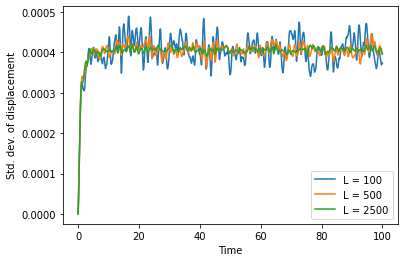

In [62]:
N = 10**5

t = np.linspace(0, dt*N, N)
sigma_x = [np.std(x[:,:Ls[0]-1], axis=1), np.std(x[:,:Ls[1]-1], axis=1), np.std(x[:,:Ls[2]-1], axis=1)]

plt.figure(6)
plt.plot(t,sigma_x[0], label='L = 100')
plt.plot(t,sigma_x[1], label='L = 500')
plt.plot(t,sigma_x[2], label='L = 2500')
plt.legend()

plt.xlabel('Time')
plt.ylabel('Std. dev. of displacement')
plt.show()

## Question 10
Analyze the autocorrelation of the process. 

### Provide:
1. What is the relationship between the standard deviation $\hat{\sigma}(k)$, autocorrelation $r_x(k,k)$ and auto-covariance $c_x(k,k)$? 
2. Now, calculate the autocorrelation $r_x(k,k+500)$ for $k=\{0,1,2,\cdots, 10^5-501\}$ using $L = 2500$ realizations. Plot the results. 
3. How does $r_x(k,k+500)$ depend on $k$?

### Answer 10
The following equation was derived: $ \hat{\sigma} (k)^2 = c_x(k,k) = r_x(k,k) + m_x \cdot m_x^* $ and since we think the mean of our signal is $0$ they would all be equal.
Thus     $\hat{\sigma} (k)^2 = c_x(k,k) = r_x(k,k)$

We see that the autocorrelation very rapidly converges to a virtually constant value (it still has minor deviations) . Therefore, it seems the autocorrelation does not really depend on the time (the value $k$).

(2500, 99500)


No handles with labels found to put in legend.


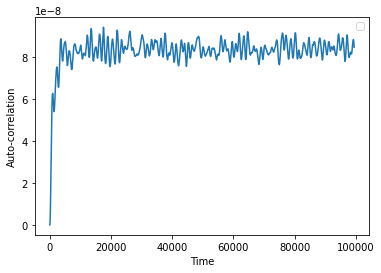

In [65]:
L = 2500
h2 = 500
h = 10**5 - h2
start = 0

Rx = np.zeros((L,h))

#print((x[0:h,:]*x[h2:int(10**5),:]).shape)

for i in range(0,L):
    Rx[i] = x[0:h,i]*np.conj(x[h2:h+h2,i])
    
print(Rx.shape)    

Rx_mean = np.mean(Rx, axis=0)

Rx = np.average(x[0:h,:]*x[h2:int(10**5),:], axis=1)
    

 
plt.figure(11)
plt.plot(Rx_mean)
#plt.plot(t[0:h], Rx, label=r'$r_x(k,k+500)$')
#plt.plot(sigma_x[2]**2, label=r'$\hat{\sigma_x}^2$ with $L=2500$')
plt.xlabel('Time')
plt.ylabel('Auto-correlation')
plt.legend()
plt.show()

## Question 11

Using the results obtained so far, what can you conclude regarding wide sense stationarity (WSS) of the random process?

### Answer 11
If we rewrite the equation found at Question 10 we can calculate the absolute mean squared of our signal using the autocorrelation and the time dependant standard deviation.

Since our data-set is finite we can't be certain:
1. but we think our mean is zero.
2. As can be seen in the graph our autocovariance is (virtually) constant after a time.
3. In question 9 we see that the variance is (virtually) constant and finite after a time.

$\hat{\sigma} (k)^2 - r_x(k,k) = m_x \cdot m_x^* = \vert m_x \vert ^2$

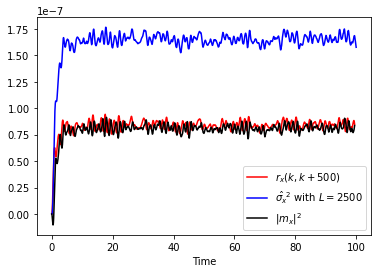

In [64]:
plt.figure(12)
plt.plot(t[0:h], Rx, label=r'$r_x(k,k+500)$', color='red')
plt.plot(t, sigma_x[2]**2, label=r'$\hat{\sigma_x}^2$ with $L=2500$', color='blue')

mean_squared = sigma_x[2][0:h]**2 - Rx

plt.plot(t[0:h], mean_squared, label=r"$\vert m_x \vert ^2$", color='black')
plt.xlabel("Time")
plt.legend()
plt.show()

